In [1]:
%pylab inline

import pandas
import matplotlib
import seaborn
import itertools

from matplotlib import pyplot
from collections import Counter
from collections import defaultdict

Populating the interactive namespace from numpy and matplotlib


In [2]:
from players import RandomPlayer, QLearningPlayer, MinimaxPlayer
from connectfour import ConnectFour, WinnerState

In [17]:
pyplot.rcParams['figure.figsize'] = 12, 6

# Definitions

In [4]:
def playAndPlot(red, blue, games = 1000):
    plotGames(playGames(red, blue, games), [type(red).__name__, type(blue).__name__])

def playGames(red, blue, games = 1000):
    return numpy.array([ConnectFour(red, blue).play() for _ in range(games)])

def playGamesRotating(red, blue, games = 1000):
    connect4 = ConnectFour(red, blue, True)
    return numpy.array([connect4.play() for _ in range(games)])

def plotRollingAvg(games, players, size = 100):
    x = numpy.arange(games.size)
    states = [WinnerState.red, WinnerState.blue]
    for state, player in zip(states, players):
        y = numpy.cumsum(games == state) / (x + 1)
        pyplot.plot(x, y, label = player, color = state.name)

    pyplot.legend()
    pyplot.xlabel('Juegos')
    pyplot.ylabel('Proporción juegos ganados')

def plotGames(games, players):
    x = numpy.arange(games.size)
    states = [WinnerState.red, WinnerState.blue]
    for state, player in zip(states, players):
        y = numpy.cumsum(games == state) / (x + 1)
        pyplot.plot(x, y, label = player, color = state.name)

    pyplot.legend()
    pyplot.xlabel('Juegos')
    pyplot.ylabel('Proporción juegos ganados')

# Learning rate experiment. QLearn as second player

In [33]:
randomOpponent = RandomPlayer(ConnectFour.moves)
qlearnOpponent = QLearningPlayer(ConnectFour.moves)
games = 100000

againstRandom = playGames(randomOpponent, QLearningPlayer(ConnectFour.moves), games)
againstQLearn = playGames(QLearningPlayer(ConnectFour.moves), QLearningPlayer(ConnectFour.moves), games)

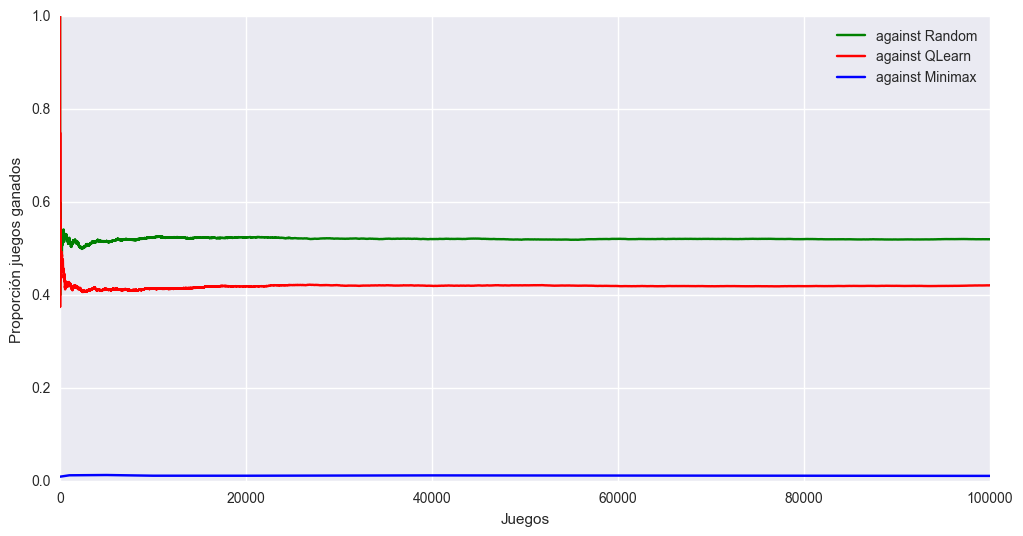

In [44]:
x = numpy.arange(games)
#epsilon = .2, alpha = .3, gamma = .9

againstRandomY = numpy.cumsum(againstRandom == WinnerState.blue) / (x + 1)
againstQLearnY = numpy.cumsum(againstQLearn == WinnerState.blue) / (x + 1)

againstMinimaxX = [0, 1000, 5000, 10000, 20000, 40000, 100000]
againstMinimaxY = [0.01, 0.013, 0.0136, 0.0121, 0.01205, 0.012775, 0.0117]

pyplot.plot(x, againstRandomY, label='against Random', color='green')
pyplot.plot(x, againstQLearnY, label='against QLearn', color='red')
pyplot.plot(againstMinimaxX, againstMinimaxY, label='against Minimax', color='blue')

pyplot.legend()
pyplot.xlabel('Juegos')
pyplot.ylabel('Proporción juegos ganados')
pyplot.savefig('learning_rate_exp1.png')

# Second Experiment. QLearn as first player

In [45]:
randomOpponent = RandomPlayer(ConnectFour.moves)
qlearnOpponent = QLearningPlayer(ConnectFour.moves)
games = 100000

againstRandom = playGames(QLearningPlayer(ConnectFour.moves), randomOpponent, games)
againstQLearn = playGames(QLearningPlayer(ConnectFour.moves), QLearningPlayer(ConnectFour.moves), games)

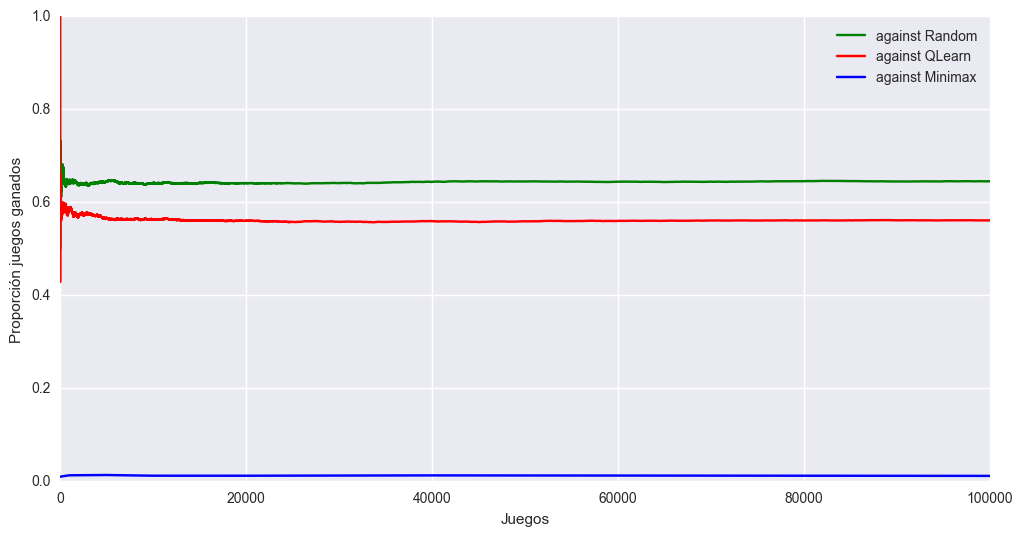

In [46]:
x = numpy.arange(games)
#epsilon = .2, alpha = .3, gamma = .9

againstRandomY = numpy.cumsum(againstRandom == WinnerState.red) / (x + 1)
againstQLearnY = numpy.cumsum(againstQLearn == WinnerState.red) / (x + 1)

againstMinimaxX = [0, 1000, 5000, 10000, 20000, 40000, 100000]
againstMinimaxY = [0.01, 0.013, 0.0136, 0.0121, 0.01205, 0.012775, 0.0117]

pyplot.plot(x, againstRandomY, label='against Random', color='green')
pyplot.plot(x, againstQLearnY, label='against QLearn', color='red')
pyplot.plot(againstMinimaxX, againstMinimaxY, label='against Minimax', color='blue')

pyplot.legend()
pyplot.xlabel('Juegos')
pyplot.ylabel('Proporción juegos ganados')
pyplot.savefig('learning_rate_exp2.png')

In [ ]:
# Third Experiment. Rotating initial player

In [ ]:
randomOpponent = RandomPlayer(ConnectFour.moves)
qlearnOpponent = QLearningPlayer(ConnectFour.moves)
games = 100000

againstRandom = playGamesRotating(QLearningPlayer(ConnectFour.moves), randomOpponent, games)
againstQLearn = playGamesRotating(QLearningPlayer(ConnectFour.moves), QLearningPlayer(ConnectFour.moves), games)

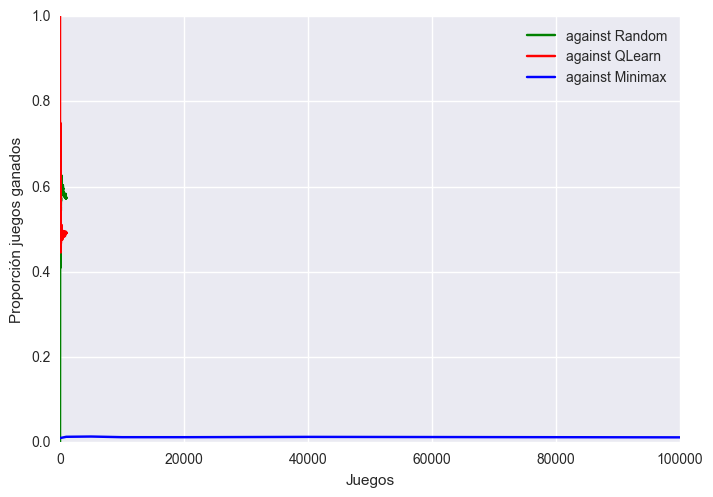

In [7]:
x = numpy.arange(games)
#epsilon = .2, alpha = .3, gamma = .9

againstRandomY = numpy.cumsum(againstRandom == WinnerState.red) / (x + 1)
againstQLearnY = numpy.cumsum(againstQLearn == WinnerState.red) / (x + 1)

againstMinimaxX = [0, 1000, 5000, 10000, 20000, 40000, 100000]
againstMinimaxY = [0.01, 0.013, 0.0136, 0.0121, 0.01205, 0.012775, 0.0117]

pyplot.plot(x, againstRandomY, label='against Random', color='green')
pyplot.plot(x, againstQLearnY, label='against QLearn', color='red')
pyplot.plot(againstMinimaxX, againstMinimaxY, label='against Minimax', color='blue')

pyplot.legend()
pyplot.xlabel('Juegos')
pyplot.ylabel('Proporción juegos ganados')
pyplot.savefig('learning_rate_exp3.png')